# Shortest Path

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

# Priority queue (Explained in the Introducing priority queues section)

In [2]:
from heapq import heapify, heappop, heappush

class priority_queue():
    def __init__(self):
        self.queue = list()
        heapify(self.queue)
        self.index = dict()
    def push(self, priority, label):
        if label in self.index:
            self.queue = [(w,l) 
                          for w,l in self.queue if l!=label]
            heapify(self.queue)
        heappush(self.queue, (priority, label))
        self.index[label] = priority 
    def pop(self):
        if self.queue:
            return heappop(self.queue)
    def __contains__(self, label):
        return label in self.index
    def __len__(self):
        return len(self.queue)

## Directed graphs

In [3]:
graph = {'A': {'B':2, 'C':3},
         'B': {'C':2, 'D':2},
         'C': {'D':3, 'E':2},
         'D': {'F':3},
         'E': {'D':1,'F':1},
         'F': {}}

In [4]:
Graph = nx.DiGraph()
for node in graph:
    Graph.add_nodes_from(node)
    for edge, weight in graph[node].items():
        Graph.add_edge(node,edge, weight=weight)

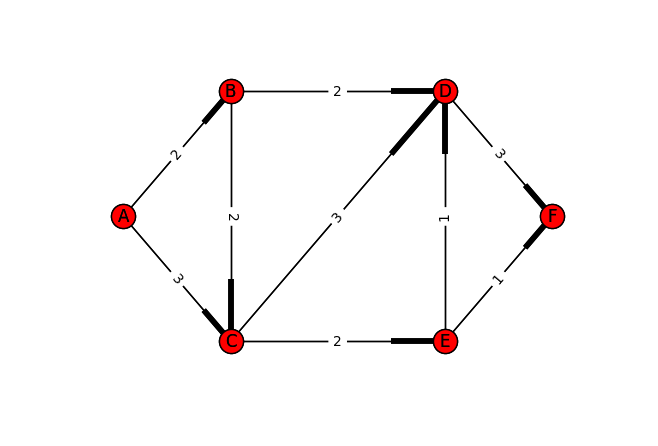

In [5]:
pos = { 'A': [0.00, 0.50], 'B': [0.25, 0.75],
        'C': [0.25, 0.25], 'D': [0.75, 0.75],
        'E': [0.75, 0.25], 'F': [1.00, 0.50]}

labels = nx.get_edge_attributes(Graph,'weight')
nx.draw(Graph, pos, with_labels=True)
nx.draw_networkx_edge_labels(Graph, pos, 
                             edge_labels=labels)
nx.draw_networkx(Graph,pos)
plt.show()

## Dijkstra algorithm

In [6]:
def dijkstra(graph, start, end):
    inf = float('inf')
    known = set()
    priority = priority_queue()
    path = {start: start}

    for vertex in graph:
        if vertex == start:
            priority.push(0, vertex)
        else:
            priority.push(inf, vertex)

    last = start    
    while last != end:
        (weight, actual_node) = priority.pop()
        if actual_node not in known:
            for next_node in graph[actual_node]:
                upto_actual = priority.index[actual_node]
                upto_next = priority.index[next_node]
                to_next = upto_actual + \
                graph[actual_node][next_node]
                if to_next < upto_next:
                    priority.push(to_next, next_node)
                    print("Found shortcut from %s to %s" 
                          % (actual_node, next_node))
                    print ("\tTotal length up so far: %i" 
                           % to_next)
                    path[next_node] = actual_node
                    
            last = actual_node
            known.add(actual_node)
    
    return priority.index, path

In [7]:
dist, path = dijkstra(graph, 'A', 'F')

Found shortcut from A to C
	Total length up so far: 3
Found shortcut from A to B
	Total length up so far: 2
Found shortcut from B to D
	Total length up so far: 4
Found shortcut from C to E
	Total length up so far: 5
Found shortcut from D to F
	Total length up so far: 7
Found shortcut from E to F
	Total length up so far: 6


In [8]:
def reverse_path(path, start, end):
    progression = [end]
    while progression[-1] != start:
        progression.append(path[progression[-1]])
    return progression[::-1]    

In [9]:
print (reverse_path(path, 'A', 'F'))

['A', 'C', 'E', 'F']


In [10]:
print (dist)

{'A': 0, 'F': 6, 'D': 4, 'C': 3, 'E': 5, 'B': 2}
